[INFO] features shape: (83484, 8192)
[INFO] labels shape: (83484,)
[INFO] splitted train and test data...
[INFO] train data  : (66787, 8192)
[INFO] test data   : (16697, 8192)
[INFO] train labels: (66787,)
[INFO] test labels : (16697,)
[INFO] creating model...
Logistic Regression Accuracy: 0.8669222015931005
Random Forest Accuracy: 0.7900820506677846


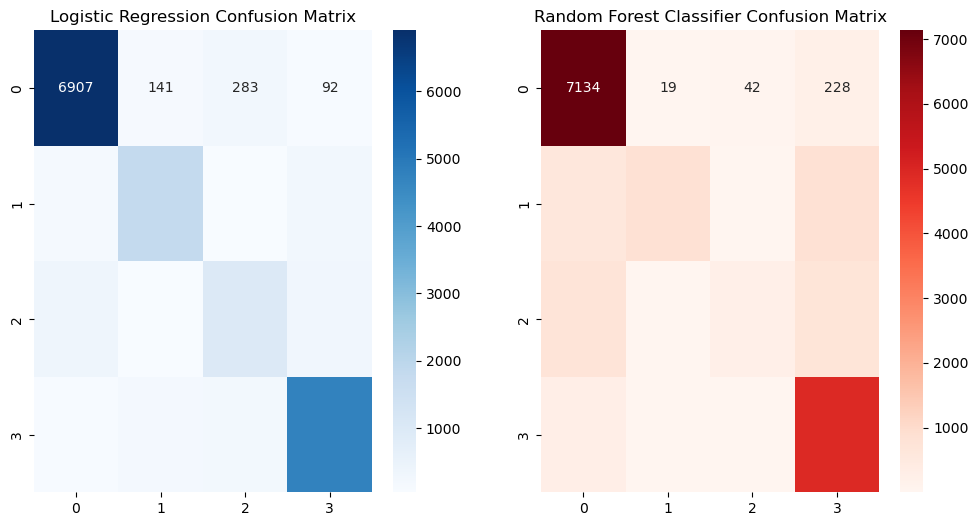

In [1]:
# imports required packages
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import h5py
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

# Configuration
config = {
    "test_size": 0.20,
    "seed": 8,
    "features_path": r"C:/Users/siva/Documents/OCT/OCT2017/features.h5",
    "labels_path": r"C:/Users/siva/Documents/OCT/OCT2017/labels.h5",
    "classifier_path": r"C:/Users/siva/Documents/OCT/OCT2017/classifier.pickle",
    "classifier_path_1": r"C:/Users/siva/Documents/OCT/OCT2017/classifier_1.pickle",
    "model_path": r"C:/Users/siva/Documents/python/Project/model",
}

# Load features and labels
h5f_data = h5py.File(config["features_path"], 'r')
h5f_label = h5py.File(config["labels_path"], 'r')

features_string = h5f_data['dataset_1']
labels_string = h5f_label['dataset_1']

features = np.array(features_string)
labels = np.array(labels_string)

h5f_data.close()
h5f_label.close()

# Verify the shape of features and labels
print("[INFO] features shape:", features.shape)
print("[INFO] labels shape:", labels.shape)

# Split the training and testing data
test_size = config["test_size"]
seed = config["seed"]
trainData, testData, trainLabels, testLabels = train_test_split(features, labels, test_size=test_size, random_state=seed)

print("[INFO] splitted train and test data...")
print("[INFO] train data  :", trainData.shape)
print("[INFO] test data   :", testData.shape)
print("[INFO] train labels:", trainLabels.shape)
print("[INFO] test labels :", testLabels.shape)

# Use logistic regression as the model
print("[INFO] creating model...")
logistic_model = LogisticRegression(random_state=seed, max_iter=1000, solver='saga')
logistic_model.fit(trainData, trainLabels)

# Train a random forest classifier model
model_1 = RandomForestClassifier(random_state=seed)
model_1.fit(trainData, trainLabels)

# Predictions
logistic_preds = logistic_model.predict(testData)
rf_preds = model_1.predict(testData)

# Calculate accuracies
logistic_accuracy = accuracy_score(testLabels, logistic_preds)
rf_accuracy = accuracy_score(testLabels, rf_preds)

print(f"Logistic Regression Accuracy: {logistic_accuracy}")
print(f"Random Forest Accuracy: {rf_accuracy}")

# Confusion matrices
logistic_cm = confusion_matrix(testLabels, logistic_preds)
rf_cm = confusion_matrix(testLabels, rf_preds)

# Visualize confusion matrices
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.heatmap(logistic_cm, annot=True, cmap="Blues", fmt='g')
plt.title("Logistic Regression Confusion Matrix")

plt.subplot(1, 2, 2)
sns.heatmap(rf_cm, annot=True, cmap="Reds", fmt='g')
plt.title("Random Forest Classifier Confusion Matrix")

plt.show()


In [41]:
# Make predictions using the random forest model
new_predictions = model_1.predict(testData)

In [2]:
# imports required packages

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import numpy as np
import h5py
import os
import json
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
config = {
    "test_size": 0.20,
    "seed": 8,
    "features_path": r"C:/Users/siva/Documents/OCT/OCT2017/features.h5",
    "labels_path": r"C:/Users/siva/Documents/OCT/OCT2017/labels.h5",
    "classifier_path": r"C:/Users/siva/Documents/OCT/OCT2017/classifier.pickle",
    "classifier_path_1": r"C:/Users/siva/Documents/OCT/OCT2017/classifier_1.pickle",
    "model_path": r"C:/Users/siva/Documents/python/Project/model",
}

In [6]:
# Load features and labels
h5f_data = h5py.File(config["features_path"], 'r')
h5f_label = h5py.File(config["labels_path"], 'r')

features_string = h5f_data['dataset_1']
labels_string = h5f_label['dataset_1']

features = np.array(features_string)
labels = np.array(labels_string)

h5f_data.close()
h5f_label.close()



In [7]:
# Verify the shape of features and labels
print("[INFO] features shape:", features.shape)
print("[INFO] labels shape:", labels.shape)

# Split the training and testing data
test_size = config["test_size"]
seed = config["seed"]
trainData, testData, trainLabels, testLabels = train_test_split(features, labels, test_size=test_size, random_state=seed)

print("[INFO] splitted train and test data...")
print("[INFO] train data  :", trainData.shape)
print("[INFO] test data   :", testData.shape)
print("[INFO] train labels:", trainLabels.shape)
print("[INFO] test labels :", testLabels.shape)

[INFO] features shape: (83484, 8192)
[INFO] labels shape: (83484,)
[INFO] splitted train and test data...
[INFO] train data  : (66787, 8192)
[INFO] test data   : (16697, 8192)
[INFO] train labels: (66787,)
[INFO] test labels : (16697,)


In [26]:
# use logistic regression as the model
print ("[INFO] creating model...")
model = LogisticRegression(random_state=seed)
model.fit(trainData, trainLabels)

[INFO] creating model...


C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=8)

In [39]:
# Predictions
logistic_preds = model.predict(testData)
rf_preds = model_1.predict(testData)

In [28]:
from sklearn.ensemble import RandomForestClassifier
seed = 8
model_1 = RandomForestClassifier(random_state=seed)
model_1.fit(trainData, trainLabels)
RF_predictions = model_1.predict(testData)

In [29]:
score = confusion_matrix(testLabels ,RF_predictions)
print(score)

[[7134   19   42  228]
 [ 610  858    2  841]
 [ 728    8  272  708]
 [ 297   18    4 4928]]


In [30]:
import pickle

# Define the path where you want to save the trained classifier
classifier_path_1 = r"C:/Users/siva/Documents/OCT/OCT2017/classifier_1.pickle"

# Make predictions using the trained model
preds_1 = model_1.predict(testData)

# Save the trained classifier using pickle
with open(classifier_path_1, 'wb') as f:
    pickle.dump(model_1, f)


In [31]:
cm_1 = confusion_matrix(testLabels, preds_1)

In [32]:
cm_1

array([[7134,   19,   42,  228],
       [ 610,  858,    2,  841],
       [ 728,    8,  272,  708],
       [ 297,   18,    4, 4928]], dtype=int64)

In [33]:
# evaluate the model of test data
preds = model.predict(testData)

In [34]:
# Define the path where you want to save the trained classifier
classifier_path = r"C:/Users/siva/Documents/OCT/OCT2017/classifier.pickle"
print("[INFO] saving model...")

# Save the trained classifier using pickle
with open(classifier_path, 'wb') as f:
    pickle.dump(model_1, f)


[INFO] saving model...


In [35]:
# display the confusion matrix
print ("[INFO] confusion matrix")

# plot the confusion matrix
cm = confusion_matrix(testLabels, preds)

[INFO] confusion matrix


In [36]:
cm

array([[6921,  134,  283,   85],
       [ 176, 1788,   55,  292],
       [ 349,   59,  972,  336],
       [  66,  174,  170, 4837]], dtype=int64)

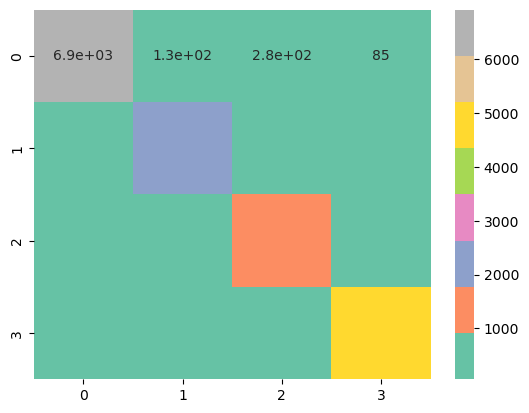

In [37]:
sns.heatmap(cm,
            annot=True,
            cmap="Set2")
plt.show()

In [40]:
# Make predictions using the random forest model
new_predictions = model_1.predict(testData)